# <ins>**Exploratory Data Analysis**</ins>

In [1]:
# Required Imports

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import ipywidgets as widgets
import json
from IPython.display import display, clear_output

In [2]:
df_companies = pd.read_csv('../data/transformed/company_final.csv')
df_companies['industry'] = df_companies['industry'].apply(json.loads)
df_companies['speciality'] = df_companies['speciality'].apply(json.loads)

In [3]:
df_companies.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 24450 entries, 0 to 24449
Data columns (total 11 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   company_id      24450 non-null  int64 
 1   name            24450 non-null  object
 2   country         24450 non-null  object
 3   state           24450 non-null  object
 4   city            24450 non-null  object
 5   url             24450 non-null  object
 6   industry        24450 non-null  object
 7   speciality      24450 non-null  object
 8   employee_count  24450 non-null  int64 
 9   follower_count  24450 non-null  int64 
 10  time_recorded   24450 non-null  object
dtypes: int64(3), object(8)
memory usage: 2.1+ MB


In [4]:
df_companies.head()

,company_id,name,country,state,city,url,industry,speciality,employee_count,follower_count,time_recorded
0,1009,IBM,US,NY,"ARMONK, NEW YORK",https://www.linkedin.com/company/ibm,[IT SERVICES AND IT CONSULTING],"[CLOUD, MOBILE, COGNITIVE, SECURITY, RESEARCH,...",311223,16314846,1970-01-20 19:58:21.255
1,1016,GE HEALTHCARE,US,0,CHICAGO,https://www.linkedin.com/company/gehealthcare,[HOSPITALS AND HEALTH CARE],"[HEALTHCARE, BIOTECHNOLOGY]",57001,2196350,1970-01-20 19:59:29.031
2,1025,HEWLETT PACKARD ENTERPRISE,US,TEXAS,HOUSTON,https://www.linkedin.com/company/hewlett-packa...,[IT SERVICES AND IT CONSULTING],[OTHER],79559,3588329,1970-01-20 19:57:33.258
3,1028,ORACLE,US,TEXAS,AUSTIN,https://www.linkedin.com/company/oracle,[IT SERVICES AND IT CONSULTING],"[ENTERPRISE, SOFTWARE, APPLICATIONS, DATABASE,...",191374,9497909,1970-01-20 19:59:00.073
4,1033,ACCENTURE,IE,0,DUBLIN 2,https://www.linkedin.com/company/accenture,[BUSINESS CONSULTING AND SERVICES],"[MANAGEMENT CONSULTING, SYSTEMS INTEGRATION AN...",565191,11890321,1970-01-20 19:59:29.451


In [5]:
# Group by industry and count the number of companies in each industry
industry_counts = df_companies.explode('industry').groupby('industry')['company_id'].count().reset_index()

# Create a treemap to visualize the different industries and company counts
fig = px.treemap(
    industry_counts,
    path=['industry'],
    values='company_id',
    title='Number of Companies per Industry'
)

fig.update_traces(textinfo='label+percent entry')
fig.update_layout(transition_duration=0)
fig.show()

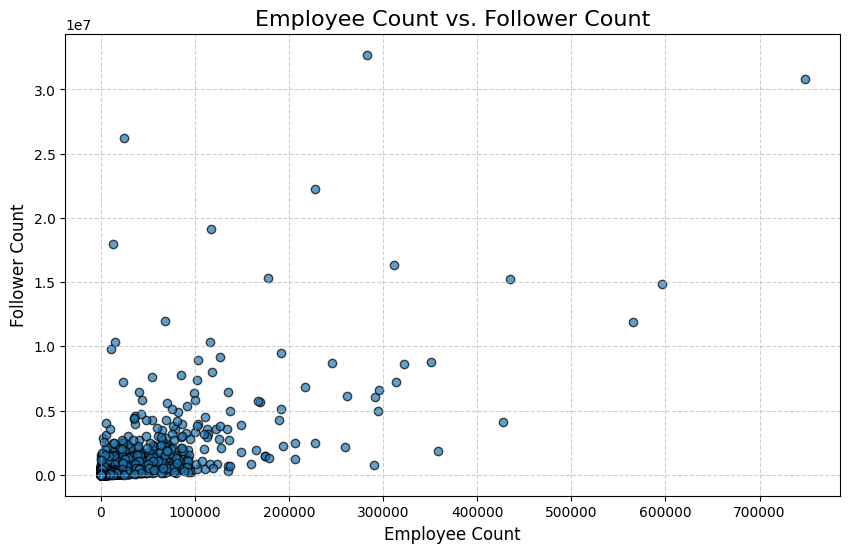

In [6]:
# Scatter plot to visualize the relationship between employee count and follower count
plt.figure(figsize=(10, 6))

# Plot the scatter points
plt.scatter(
    df_companies["employee_count"],
    df_companies["follower_count"],
    alpha=0.7,
    edgecolors='k'
)

# Add labels, title, and grid
plt.title("Employee Count vs. Follower Count", fontsize=16)
plt.xlabel("Employee Count", fontsize=12)
plt.ylabel("Follower Count", fontsize=12)
plt.grid(True, linestyle='--', alpha=0.6)

In [7]:
# Group by country and count the number of companies in each country
country_counts = df_companies.groupby('country')['company_id'].count().reset_index()

# Rename columns for compatibility with the choropleth function
country_counts.columns = ['country', 'company_count']

# Create a choropleth map to visualize the number of companies in each country
fig = px.choropleth(
    country_counts,
    locations='country',
    locationmode='country names',
    color='company_count',
    hover_name='country',
    color_continuous_scale='Blues',
    title='Number of Companies in Each Country'
)

fig.update_layout(
    coloraxis_colorbar=dict(title="Number of Companies"),
)

fig.show("vscode")

In [8]:
company_names = df_companies['name'].unique().tolist()

# Create a dropdown widget
dropdown = widgets.Dropdown(
    options=company_names,
    description='Select Company:',
    disabled=False,
)

# Create an output widget to display company details
output = widgets.Output()

def on_change(change):
    if change['type'] == 'change' and change['name'] == 'value':
        with output:
            clear_output()
            selected_company = change['new']
            company_details = df_companies[df_companies['name'] == selected_company]
            if not company_details.empty:
                print("Company Details:")
                print(company_details.transpose())
            else:
                print("Company not found.")

dropdown.observe(on_change)

display(dropdown, output)

Dropdown(description='Select Company:', options=('IBM', 'GE HEALTHCARE', 'HEWLETT PACKARD ENTERPRISE', 'ORACLE…

Output()

In [9]:
df_job_postings = pd.read_csv('../data/transformed/wrangled_job_postings.csv')

df_job_postings["industry"] = df_job_postings["industry"].apply(json.loads)
df_job_postings["speciality"] = df_job_postings["speciality"].apply(json.loads)
df_job_postings["benefits"] = df_job_postings["benefits"].apply(json.loads)

In [10]:
pd.set_option("display.max_columns", None)
df_job_postings.head()

,job_id,job_posting_url,company_id,name,country,state,city,title,description,formatted_experience_level,work_type,remote_allowed,normalized_salary,salary_calc,experience_derived,workhours_derived,currency,views,applies,listed_time,original_listed_time,expiry,url,industry,speciality,benefits,employee_count,follower_count,time_recorded,combined_features
0,921716,https://www.linkedin.com/jobs/view/921716/?trk...,2774458,CORCORAN SAWYER SMITH,US,NJ,JERSEY CITY,MARKETING COORDINATOR,Job descriptionA leading real estate firm in N...,OTHER,FULL_TIME,0,38480.0,NaN,0,0,USD,20,2.0,2024-04-17 23:45:08,2024-04-17 23:45:08,2024-05-17 23:45:08,https://www.linkedin.com/company/corcoran-sawy...,"[""REAL ESTATE""]","[""REAL ESTATE"", ""NEW DEVELOPMENT""]",[],402,2351,1970-01-20 19:56:49.275,MARKETING COORDINATOR US CORCORAN SAWYER SMITH...
1,10998357,https://www.linkedin.com/jobs/view/10998357/?t...,64896719,THE NATIONAL EXEMPLAR,US,OHIO,MARIEMONT,ASSITANT RESTAURANT MANAGER,The National Exemplar is accepting application...,OTHER,FULL_TIME,0,55000.0,NaN,0,0,USD,8,0.0,2024-04-16 14:26:54,2024-04-16 14:26:54,2024-05-16 14:26:54,https://www.linkedin.com/company/the-national-...,"[""RESTAURANTS""]","""[OTHER]""",[],15,40,1970-01-20 19:54:39.321,ASSITANT RESTAURANT MANAGER US THE NATIONAL EX...
2,23221523,https://www.linkedin.com/jobs/view/23221523/?t...,766262,"ABRAMS FENSTERMAN, LLP",US,NEW YORK,LAKE SUCCESS,SENIOR ELDER LAW / TRUSTS AND ESTATES ASSOCIAT...,Senior Associate Attorney - Elder Law / Trusts...,OTHER,FULL_TIME,0,157500.0,NaN,15,0,USD,16,0.0,2024-04-12 04:23:32,2024-04-12 04:23:32,2024-05-12 04:23:32,https://www.linkedin.com/company/abrams-fenste...,"[""LAW PRACTICE""]","[""CIVIL LITIGATION"", ""CORPORATE & SECURITIES L...",[401(K)],222,2427,1970-01-20 19:48:17.299,SENIOR ELDER LAW / TRUSTS AND ESTATES ASSOCIAT...
3,91700727,https://www.linkedin.com/jobs/view/91700727/?t...,1481176,DOWNTOWN RALEIGH ALLIANCE,US,NORTH CAROLINA,RALEIGH,ECONOMIC DEVELOPMENT AND PLANNING INTERN,Job summary:The Economic Development & Plannin...,OTHER,INTERNSHIP,0,35360.0,NaN,0,0,USD,9,4.0,2024-04-18 16:01:39,2024-04-18 16:01:39,2024-05-18 16:01:39,https://www.linkedin.com/company/downtownralei...,"[""NON-PROFIT ORGANIZATIONS""]","[""ECONOMIC DEVELOPMENT"", ""CLEAN & SAFE AMBASSO...",[],22,7825,1970-01-20 19:57:39.851,ECONOMIC DEVELOPMENT AND PLANNING INTERN US DO...
4,103254301,https://www.linkedin.com/jobs/view/103254301/?...,81942316,RAW CEREAL,US,CA,LOS ANGELES,PRODUCER,Company DescriptionRaw Cereal is a creative de...,OTHER,CONTRACT,1,180000.0,NaN,0,0,USD,7,1.0,2024-04-11 18:43:39,2024-04-11 18:43:39,2024-05-11 18:43:39,https://www.linkedin.com/company/raw-cereal,"[""DESIGN SERVICES""]","""[OTHER]""",[],11,447,1970-01-20 19:47:41.202,PRODUCER US RAW CEREAL OTHER CONTRACT


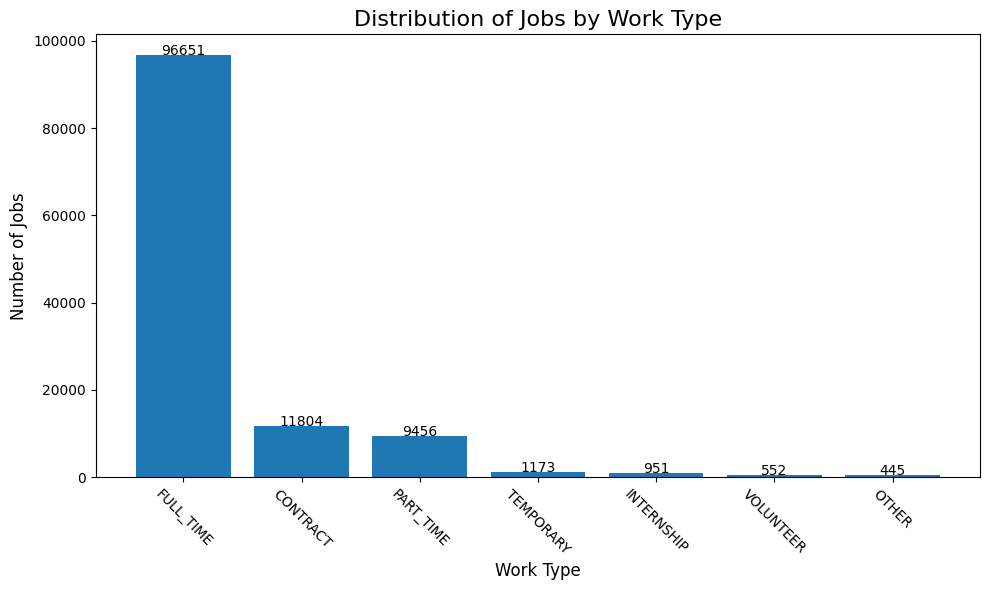

In [11]:
# Group by work_type and count the number of jobs in each type
work_type_counts = df_job_postings.groupby('work_type')['job_id'].count().reset_index()

# Sort the work type counts in descending order
work_type_counts = work_type_counts.sort_values('job_id', ascending=False)

# Create a bar chart to visualize the distribution of jobs by work type
plt.figure(figsize=(10, 6))
plt.bar(
    work_type_counts['work_type'],
    work_type_counts['job_id']
)
for index, value in enumerate(work_type_counts['job_id']):
    plt.text(
        index,
        value + 1,  # Position text slightly above the bar
        str(value),
        ha='center',
        fontsize=10
    )

# Add title and labels
plt.title('Distribution of Jobs by Work Type', fontsize=16)
plt.xlabel('Work Type', fontsize=12)
plt.ylabel('Number of Jobs', fontsize=12)
plt.xticks(rotation=-45)  # Rotate x-axis labels

# Display the chart
plt.tight_layout()  # Adjust layout to prevent clipping
plt.show()

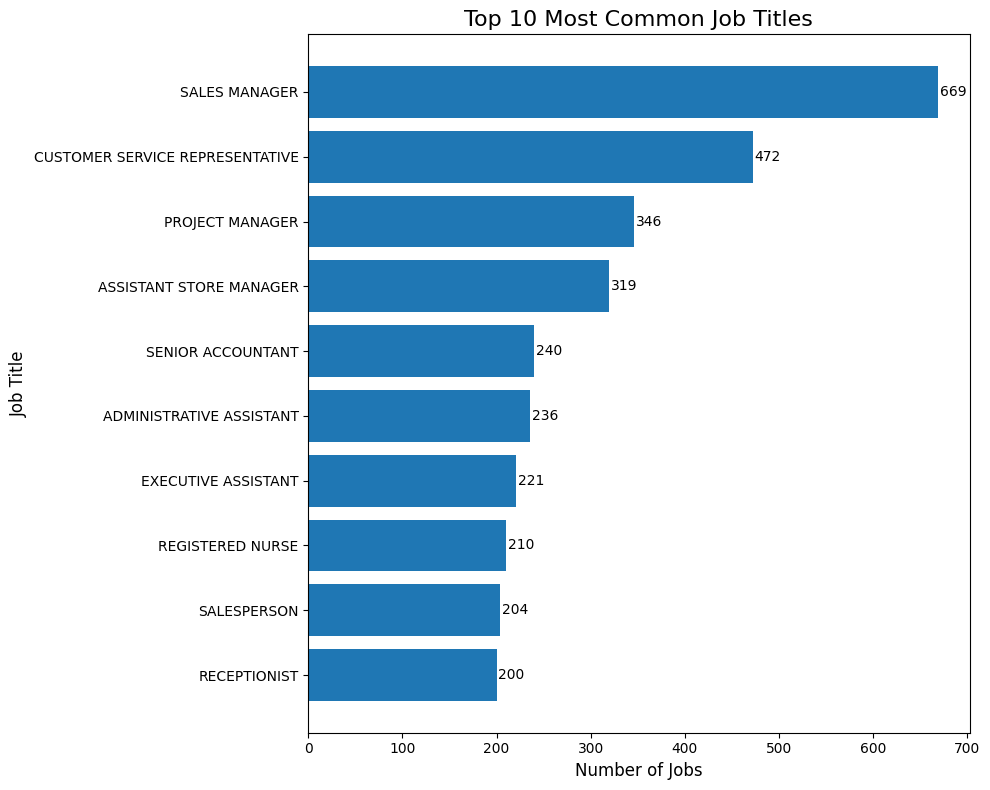

In [12]:
# Group by job title and count the number of occurrences
job_title_counts = df_job_postings.groupby('title')['job_id'].count().reset_index()

# Sort the job title counts in descending order to get the most common titles
job_title_counts = job_title_counts.sort_values('job_id', ascending=False)

# Select the top N most common job titles
top_n = 10
top_job_titles = job_title_counts.head(top_n)

# Create a bar chart to visualize the most common job titles
plt.figure(figsize=(10, 8))
plt.barh(
    top_job_titles['title'],
    top_job_titles['job_id']
)

# Add text labels to the right of the bars
for index, value in enumerate(top_job_titles['job_id']):
    plt.text(
        value + 2,  # Position the text slightly to the right of the bar
        index,  # Align with the y-axis
        str(value),
        va='center',
        fontsize=10
    )

# Add title and labels
plt.title(f'Top {top_n} Most Common Job Titles', fontsize=16)
plt.xlabel('Number of Jobs', fontsize=12)
plt.ylabel('Job Title', fontsize=12)

# Invert the y-axis for better readability (highest value on top)
plt.gca().invert_yaxis()

# Display the chart
plt.tight_layout()
plt.show()

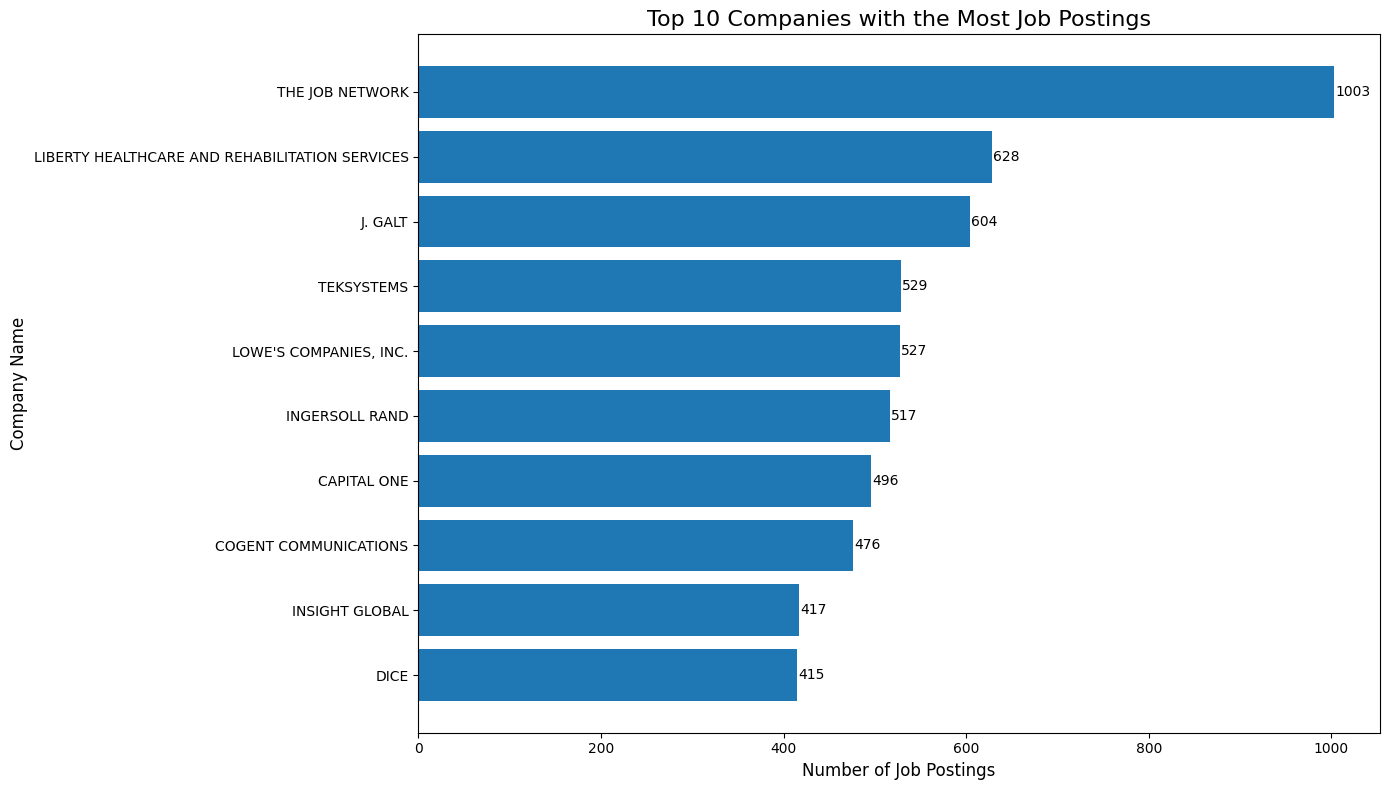

In [13]:
# Group by company name and count the number of job postings
company_job_counts = df_job_postings.groupby('name')['job_id'].count().reset_index()

# Sort the company job counts in descending order to get the companies with the most postings
company_job_counts = company_job_counts.sort_values('job_id', ascending=False)

# Select the top N companies with the most job postings
top_n = 10
top_companies = company_job_counts.head(top_n)

# Create a bar chart to visualize the companies with the most job postings
plt.figure(figsize=(14, 8))
plt.barh(
    top_companies['name'],
    top_companies['job_id']
)

# Add text labels to the right of the bars
for index, value in enumerate(top_companies['job_id']):
    plt.text(
        value + 1,  # Position the text slightly to the right of the bar
        index,  # Align with the y-axis
        str(value),
        va='center',
        fontsize=10
    )

# Add title and labels
plt.title(f'Top {top_n} Companies with the Most Job Postings', fontsize=16)
plt.xlabel('Number of Job Postings', fontsize=12)
plt.ylabel('Company Name', fontsize=12)

# Invert the y-axis for better readability (highest value on top)
plt.gca().invert_yaxis()

# Display the chart
plt.tight_layout()  # Adjust layout to prevent clipping
plt.show()

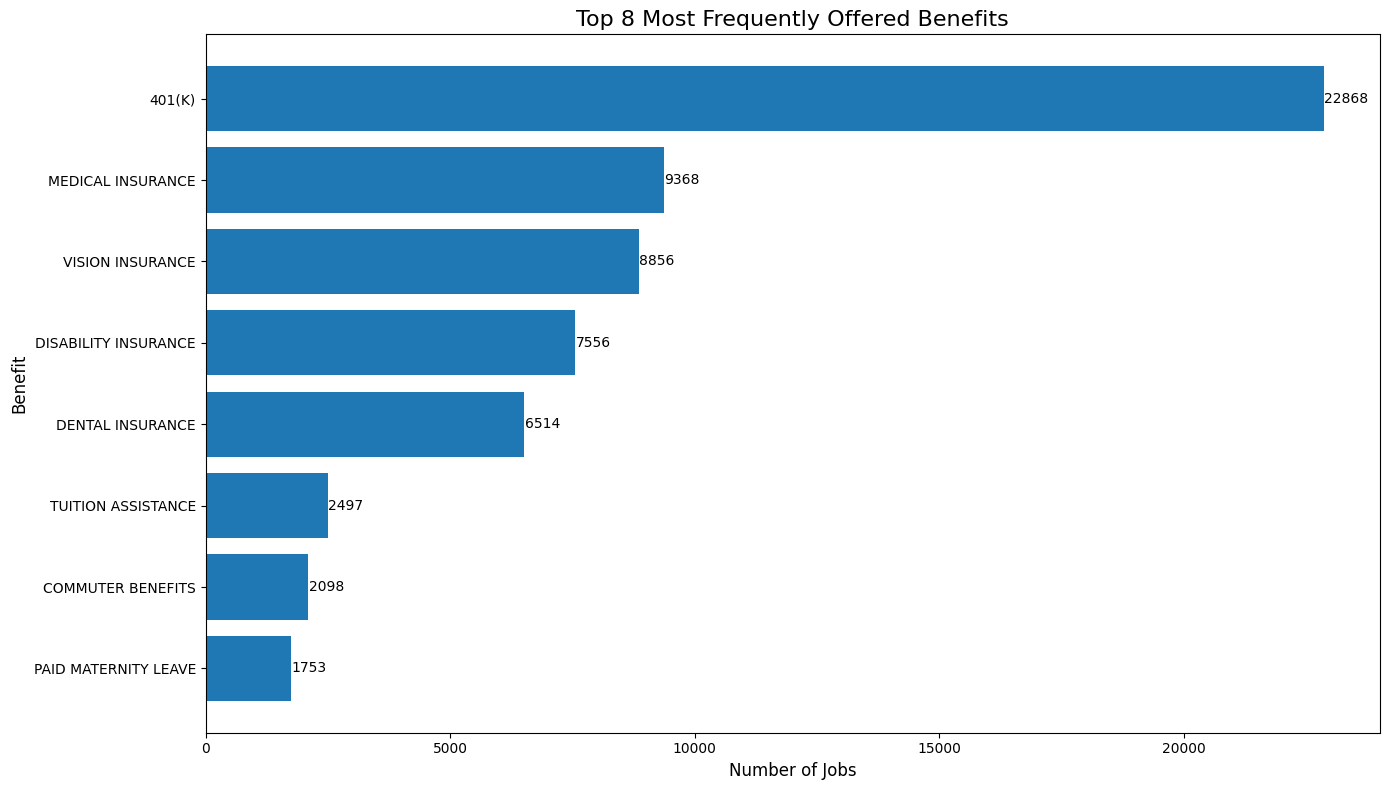

In [14]:
# Flatten the 'benefits' list and count the occurrences of each benefit
all_benefits = [benefit for benefits_list in df_job_postings['benefits'].dropna() for benefit in benefits_list]
benefit_counts = pd.Series(all_benefits).value_counts()

# Select the top N most frequent benefits and filter out the first 2
top_n_benefits = 10
top_benefits = benefit_counts.head(top_n_benefits).iloc[2:]  # Skip the first 2 benefits

# Create a bar chart to visualize the most frequent benefits
plt.figure(figsize=(14, 8))
plt.barh(
    top_benefits.index,
    top_benefits.values
)

# Add text labels to the right of the bars
for index, value in enumerate(top_benefits.values):
    plt.text(
        value + 6,  # Position the text slightly to the right of the bar
        index,  # Align with the y-axis
        str(value),
        va='center',
        fontsize=10
    )

# Add title and labels
plt.title(f"Top {top_n_benefits - 2} Most Frequently Offered Benefits", fontsize=16)
plt.xlabel("Number of Jobs", fontsize=12)
plt.ylabel("Benefit", fontsize=12)

# Invert the y-axis for better readability (highest value on top)
plt.gca().invert_yaxis()

# Display the chart
plt.tight_layout()  # Adjust layout to prevent clipping
plt.show()

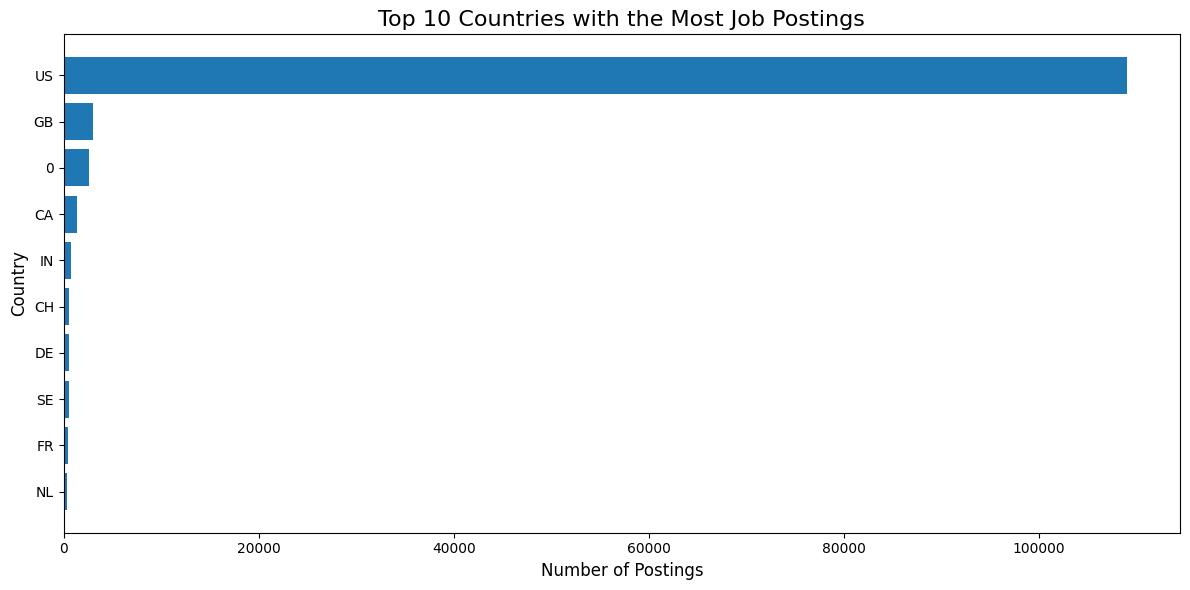

In [15]:
# Get the top 10 countries with the most job postings
top_countries = df_job_postings['country'].value_counts().head(10).sort_values(ascending=True)

# Plotting the bar chart horizontally
plt.figure(figsize=(12, 6))
plt.barh(
    top_countries.index,
    top_countries.values
)

# Adding title and labels
plt.title('Top 10 Countries with the Most Job Postings', fontsize=16)
plt.xlabel('Number of Postings', fontsize=12)
plt.ylabel('Country', fontsize=12)

# Show the plot
plt.tight_layout()
plt.show()

C:\Users\athar\AppData\Local\Temp\ipykernel_92768\4109060222.py:3: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.




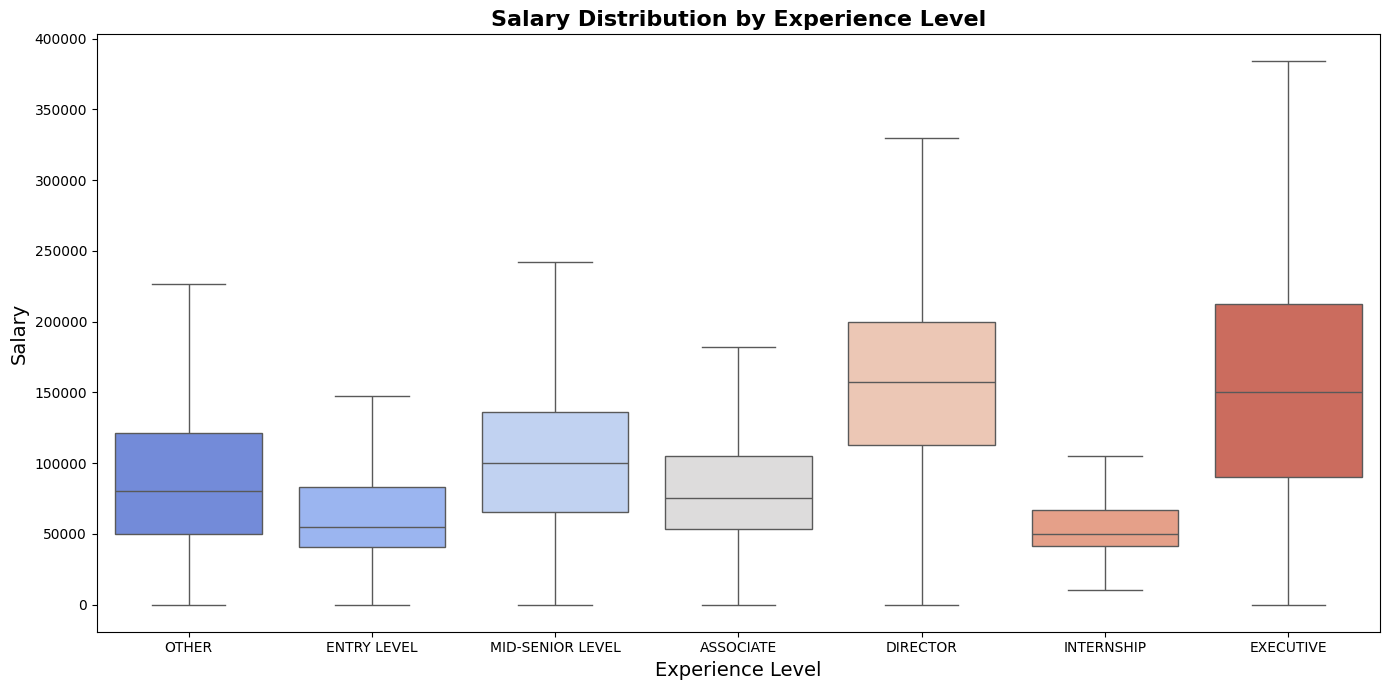

In [16]:
# Create the boxplot
plt.figure(figsize=(14, 7))
ax = sns.boxplot(
    data=df_job_postings, 
    x='formatted_experience_level', 
    y='normalized_salary', 
    showfliers=False, 
    palette='coolwarm'
)

# Add titles and labels
ax.set_title('Salary Distribution by Experience Level', fontsize=16, fontweight='bold')
ax.set_xlabel('Experience Level', fontsize=14)
ax.set_ylabel('Salary', fontsize=14)

# Show the plot
plt.tight_layout()
plt.show()

C:\Users\athar\AppData\Local\Temp\ipykernel_92768\2766218830.py:3: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.




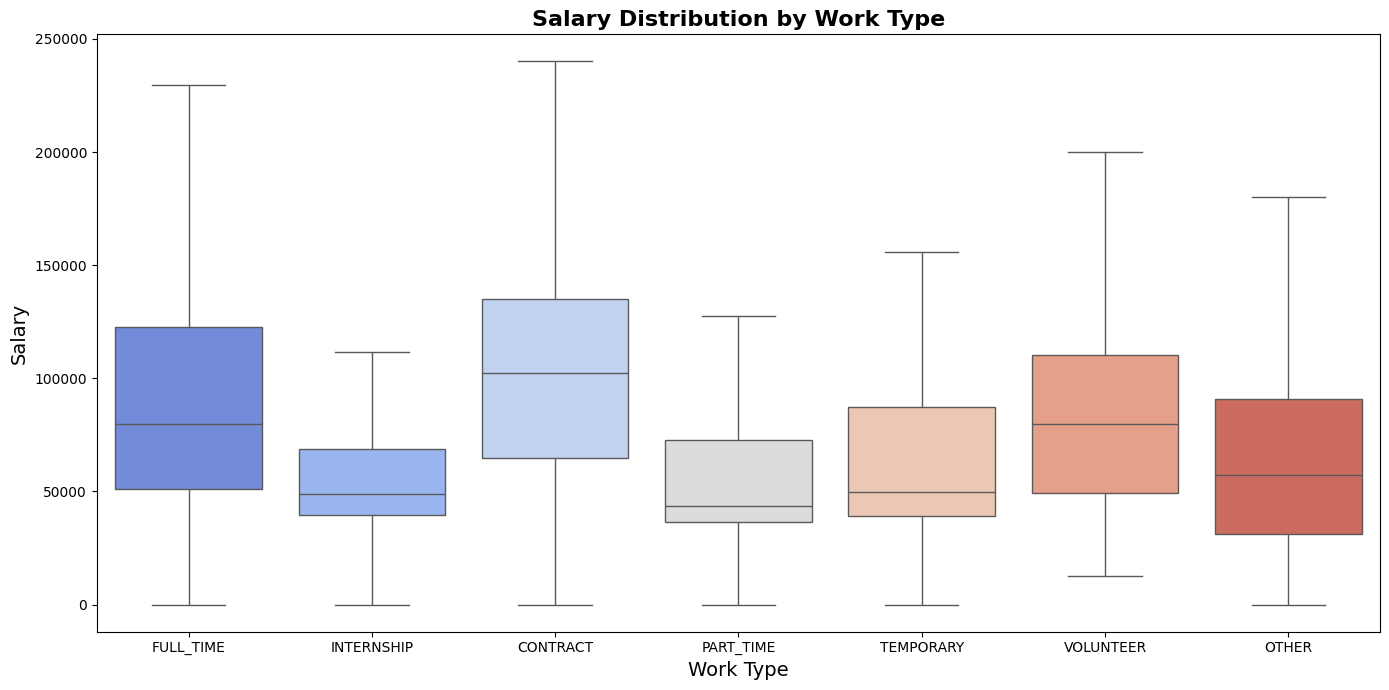

In [17]:
# Create the boxplot
plt.figure(figsize=(14, 7))
ax = sns.boxplot(
    data=df_job_postings, 
    x='work_type', 
    y='normalized_salary', 
    showfliers=False, 
    palette='coolwarm'
)

# Add titles and labels
ax.set_title('Salary Distribution by Work Type', fontsize=16, fontweight='bold')
ax.set_xlabel('Work Type', fontsize=14)
ax.set_ylabel('Salary', fontsize=14)

# Show the plot
plt.tight_layout()
plt.show()

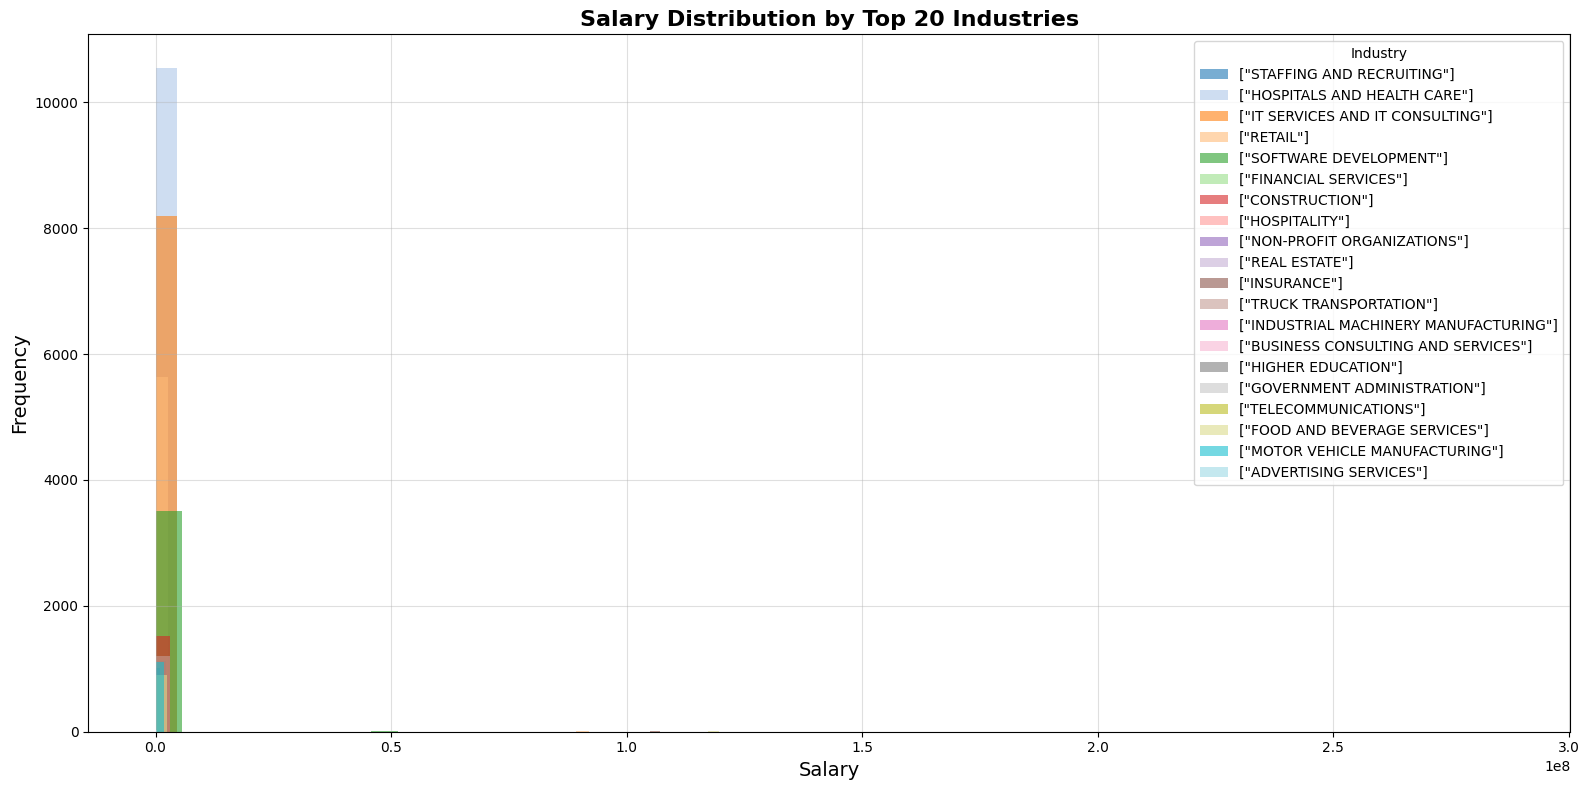

In [18]:
# Explode the industry list to handle multiple industries per job posting
df_exploded = df_job_postings.explode('industry')

# Count the number of job postings per industry and get the top 20 industries
top_20_industries = df_exploded['industry'].value_counts().head(20).index

# Filter the exploded DataFrame to include only the top 20 industries
df_top20 = df_exploded[df_exploded['industry'].isin(top_20_industries)]

# Plot the salary distribution by industry (Top 20)
plt.figure(figsize=(16, 8))
colors = plt.cm.tab20(np.linspace(0, 1, len(top_20_industries)))  # Use a colormap for better distinction

for industry, color in zip(top_20_industries, colors):
    # Filter data for the current industry
    salaries = df_top20[df_top20['industry'] == industry]['salary_calc']
    plt.hist(
        salaries, 
        bins=50, 
        alpha=0.6,  # Transparency to handle overlap
        label=industry, 
        color=color
    )

# Add titles and labels
plt.title('Salary Distribution by Top 20 Industries', fontsize=16, fontweight='bold')
plt.xlabel('Salary', fontsize=14)
plt.ylabel('Frequency', fontsize=14)

# Add legend
plt.legend(loc='upper right', fontsize=10, title='Industry')

# Add grid for better readability
plt.grid(alpha=0.4)

# Show the plot
plt.tight_layout()
plt.show()

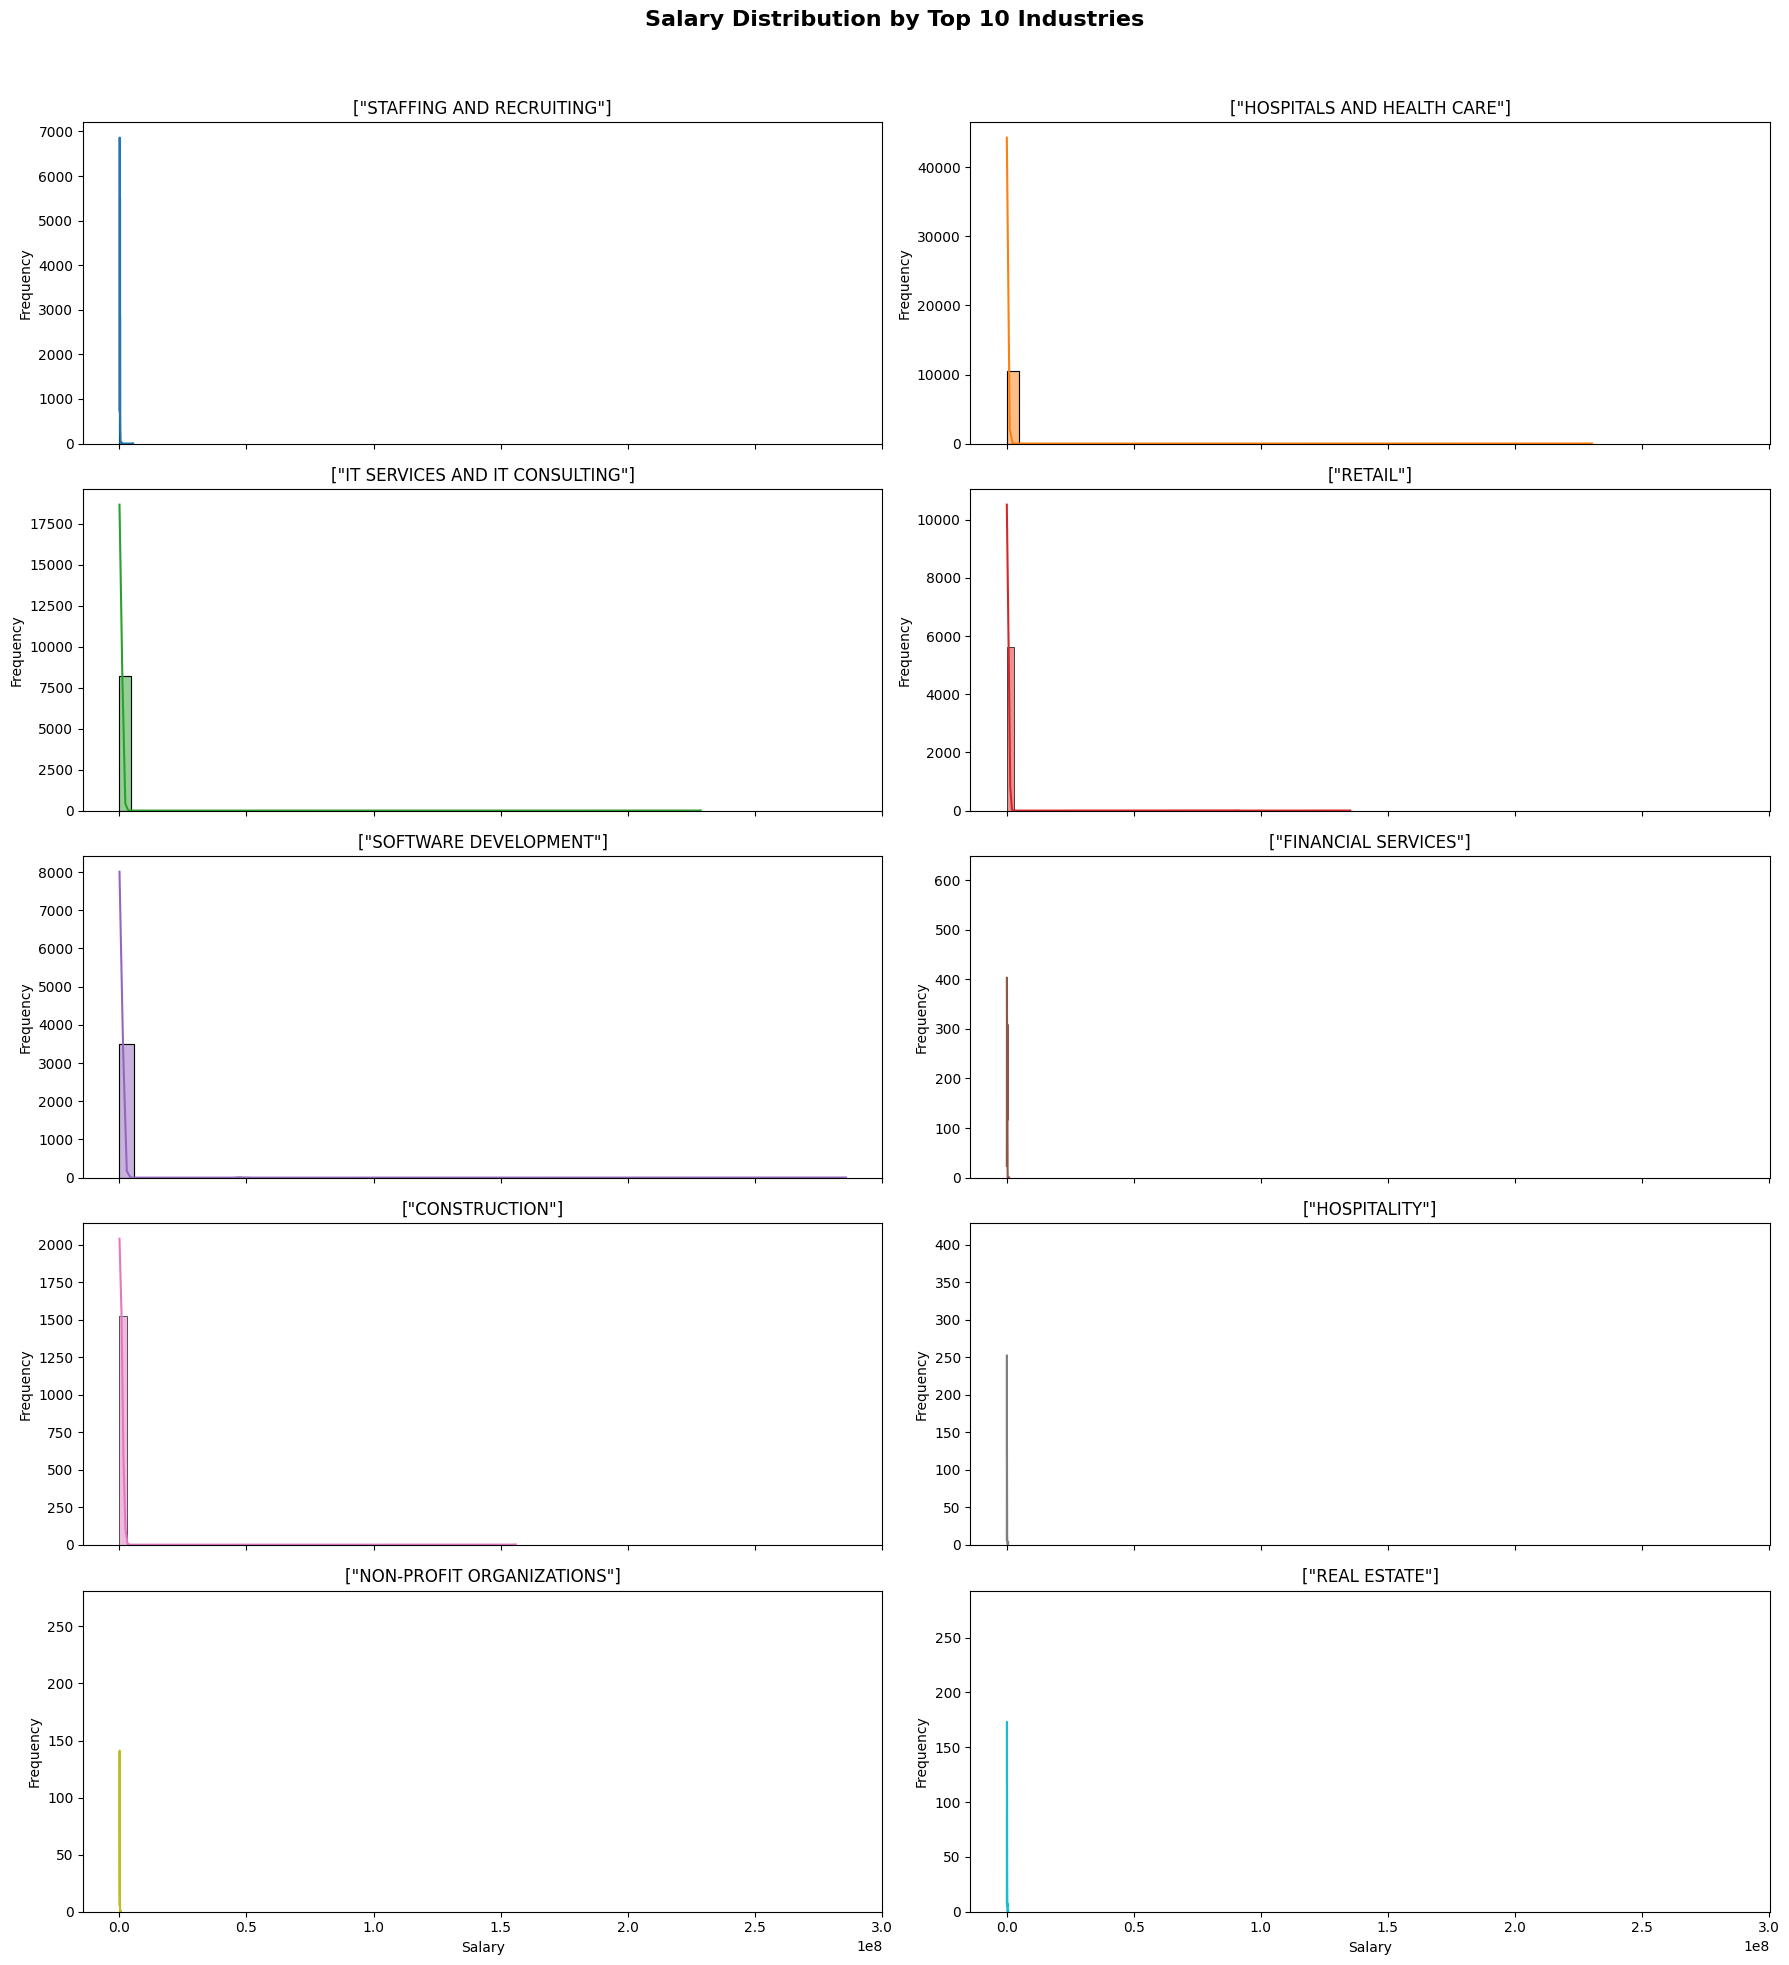

In [19]:
# Filter for the top 10 industries
top_10_industries = top_20_industries[:10]
df_top10 = df_top20[df_top20['industry'].isin(top_10_industries)]

# Create subplots
fig, axes = plt.subplots(nrows=5, ncols=2, figsize=(18, 20), sharex=True)
axes = axes.flatten()

for i, industry in enumerate(top_10_industries):
    ax = axes[i]
    sns.histplot(
        df_top10[df_top10['industry'] == industry]['salary_calc'],
        kde=True, bins=50, ax=ax, color=plt.cm.tab10(i)
    )
    ax.set_title(industry, fontsize=12)
    ax.set_xlabel('Salary', fontsize=10)
    ax.set_ylabel('Frequency', fontsize=10)

# Adjust layout
plt.suptitle('Salary Distribution by Top 10 Industries', fontsize=16, fontweight='bold')
plt.tight_layout(rect=[0, 0, 1, 0.96])
plt.show()
